In [13]:
import numpy as np
import cv2
from show_image import show_rgb_image
from show_image import show_images
%matplotlib inline

---

- ## 최댓값, 최솟값 연산

<br>

- ### cv2.min(src1, src2)
    - #### 두 배열 원소마다 비교하여 작은 값을 출력
 
- ### cv2.max(src2, src2)
    - #### 두 배열 원소마다 비교하여 큰 값을 출력

In [9]:
arr = np.random.randint(1, 100, 15)
arr = arr.reshape((3, 5))
print(arr)
print()

print("cv2.min(arr, 30)")
print(cv2.min(arr, 30))
print()

print("cv2.max(arr, 30)")
print(cv2.max(arr, 30))
print()

[[ 6 74 12 77 27]
 [38  8 26  3 93]
 [24 88 55 13 62]]

cv2.min(arr, 30)
[[ 6 30 12 30 27]
 [30  8 26  3 30]
 [24 30 30 13 30]]

cv2.max(arr, 30)
[[30 74 30 77 30]
 [38 30 30 30 93]
 [30 88 55 30 62]]



- ### cv2.minMaxLoc(src)
  - #### (최솟값, 최댓값, 최솟값 위치, 최대값 위치) 출력\
  - #### 각 위치값 (x, y) 형태로 출력

In [11]:
print(arr)
print()

cv2.minMaxLoc(arr)

[[ 6 74 12 77 27]
 [38  8 26  3 93]
 [24 88 55 13 62]]



(3.0, 93.0, (3, 1), (4, 1))

---

- ## 최대, 최소값 이용한 대비 조절
    - #### 1. 화소의 최소값을 0으로 맞추기
        - #### 전체 화소에서 화소의 최소값을 빼줌
    - #### 2. 화소의 범위가 (0~최댓값-최솟값)으로 줄어듬
    - #### 3. 줄어든 화소의 범위를 다시 (0~255)로 바꿔줌

원본 영상 최소값: 13.0, 최대값: 107.0
수정 영상 최소값: 0.0, 최대값: 255.0


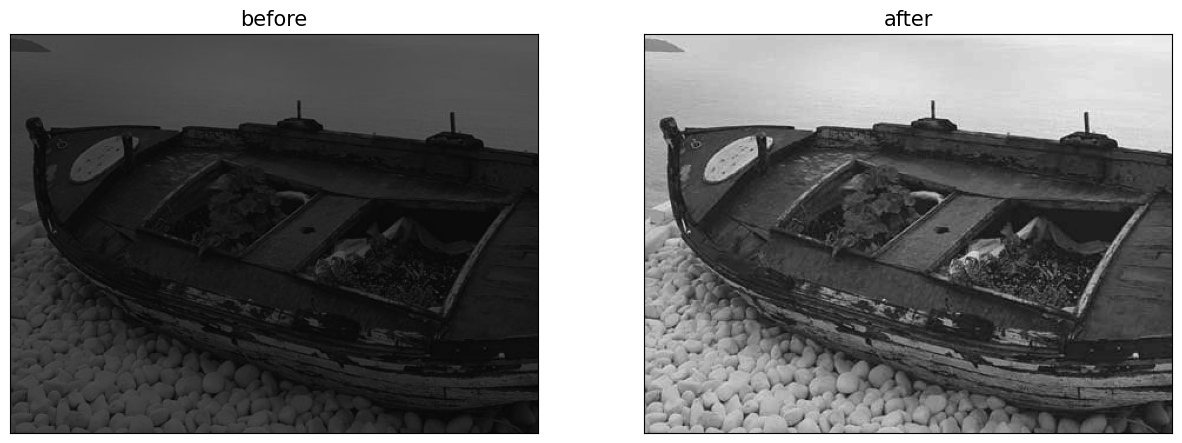

In [25]:
image = cv2.imread("./images/chap05/minMax.jpg", cv2.IMREAD_GRAYSCALE)

min_val, max_val, _, _ = cv2.minMaxLoc(image)

image = np.uint8(image - min_val)

ratio = (255 / (max_val - min_val))
new_image = np.uint8(np.round(image * ratio))

print("원본 영상 최소값: {0}, 최대값: {1}".format(min_val, max_val))

new_min, new_max, _, _ = cv2.minMaxLoc(new_image)
print("수정 영상 최소값: {0}, 최대값: {1}".format(new_min, new_max))

show_images({"before": image, "after": new_image}, 15)

---

- ## 컬러 채널별 통계함수
    - #### cv2.sumElems(array)
        - ##### 각 채널별 합
    - #### cv2.mean(array, mask)
        - ##### 각 채널별 평균
    - #### cv2.meanStdDev(array)
        - ##### 각 채널별 평균, 표준편차    

sum_value:  (15865577.0, 15880547.0, 16470875.0, 0.0)
mean_value:  (132.21314166666667, 132.33789166666668, 137.25729166666667, 0.0)
masked_mean_value:  (80.26520000000001, 81.59740000000001, 90.3211, 0.0)


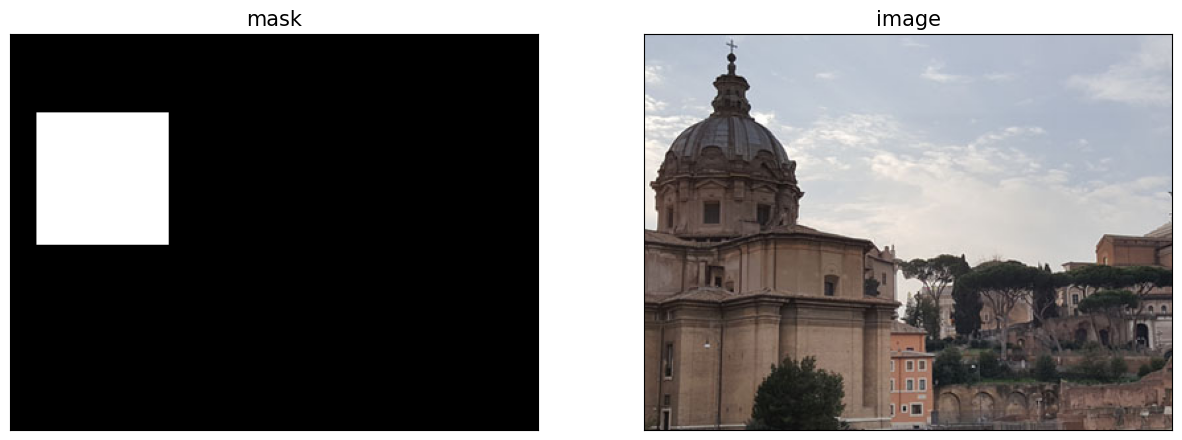

In [41]:
image = cv2.imread("./images/chap05/sum_test.jpg", cv2.IMREAD_COLOR)

mask_region = ((60, 160), (20, 120))
mask = np.zeros(image.shape[:2], dtype="uint8")
y_start, y_end = mask_region[0]
x_start, x_end = mask_region[1]
mask[y_start: y_end, x_start: x_end] = 255

sum_value = cv2.sumElems(image)
print("sum_value: ", sum_value)

mean_value = cv2.mean(image)
print("mean_value: ", mean_value)

masked_mean_value = cv2.mean(image, mask)
print("masked_mean_value: ", masked_mean_value)

show_images({"mask": mask, "image": image}, 15)

---

- ## 행렬 전체 원소에 대한 연산

In [84]:
arr = np.uint8(np.random.randint(0, 100, 15).reshape((3, 5)))
arr

array([[23, 82, 18, 84,  9],
       [68, 14, 87, 98, 44],
       [32, 11, 70, 76, 81]], dtype=uint8)

<br>

- ### cv2.countNonZero(array)

In [85]:
cv2.countNonZero(arr)

15

<br>

- ### cv2.reduce(array, dim, rtype)
    - #### 실수 타입 array 만 연산 가능
  
    - #### dim
        - ##### 0: 열 방향 연산(세로)
        - ##### 1: 행 방향 연산(가로)
     
    - #### rtype
        - ##### cv2.REDUCE_SUM: 합
        - ##### cv2.REDUCE_AVG: 평균
        - ##### cv2.REDUCE_MAX: 최댓값
        - ##### cv2.REDUCE_MIN: 최솟값

- #### 세로방향 합

In [108]:
m = arr.astype('float32')
cv2.reduce(m, dim=0, rtype=cv2.REDUCE_SUM)

array([[123., 107., 175., 258., 134.]], dtype=float32)

- #### 가로방향 합

In [109]:
cv2.reduce(m, dim=1, rtype=cv2.REDUCE_SUM)

array([[216.],
       [311.],
       [270.]], dtype=float32)

<br>

- ### cv2.sort(array, flags)
    - #### 정렬된 상태 array 리턴
- ### cv2.sortIdx(array, flags) = np.argsort(arr, axis)
    - #### 원소 인덱스 array 리턴
- #### flags
    - ##### cv2.SORT_EVERY_ROW: 가로 방향 정렬
    - ##### cv2.SORT_EVERY_COLUMN: 세로 방향 정렬
    - ##### cv2.SORT_ASCENDING: 오름차순
    - ##### cv2.SORT_DESCENDING: 내림차순

In [86]:
arr

array([[23, 82, 18, 84,  9],
       [68, 14, 87, 98, 44],
       [32, 11, 70, 76, 81]], dtype=uint8)

- #### 가로방향 오름차순

In [87]:
cv2.sort(arr, cv2.SORT_EVERY_ROW)

array([[ 9, 18, 23, 82, 84],
       [14, 44, 68, 87, 98],
       [11, 32, 70, 76, 81]], dtype=uint8)

- #### 가로방향 오름차순으로 정렬된 상태 원소의 원래 위치를 담은 매트릭스 리턴

In [103]:
print(cv2.sortIdx(arr, cv2.SORT_EVERY_ROW))

print(np.argsort(arr, axis=1)) # argsort axis=0: 세로방향, 1: 가로방향

[[4 2 0 1 3]
 [1 4 0 2 3]
 [1 0 2 3 4]]
[[4 2 0 1 3]
 [1 4 0 2 3]
 [1 0 2 3 4]]


- #### 세로방향 오름차순

In [88]:
cv2.sort(arr, cv2.SORT_EVERY_COLUMN)

array([[23, 11, 18, 76,  9],
       [32, 14, 70, 84, 44],
       [68, 82, 87, 98, 81]], dtype=uint8)

- #### 가로방향 내림차순

In [89]:
cv2.sort(arr, cv2.SORT_EVERY_ROW + cv2.SORT_DESCENDING)

array([[84, 82, 23, 18,  9],
       [98, 87, 68, 44, 14],
       [81, 76, 70, 32, 11]], dtype=uint8)